## Required model files:

Fine tuned YoloV8: "/home/xionjing/CyroEM_segment/best.pt"

SAM model: vit_h: ViT-H SAM model

Download from https://github.com/facebookresearch/segment-anything

## YoloV8 Infer

In [3]:
import torch
torch.cuda.is_available()

True

File: T39 Rd2 FAP Arm C_15-9-8-2_73000x.png
Bounding boxes:176
YoloV8 Inference time:12.22 seconds.
Bounding box prediction image generated: /home/xionjing/cuda/T39 Rd2 FAP Arm C_15-9-8-2_73000x.png_bbox.jpg


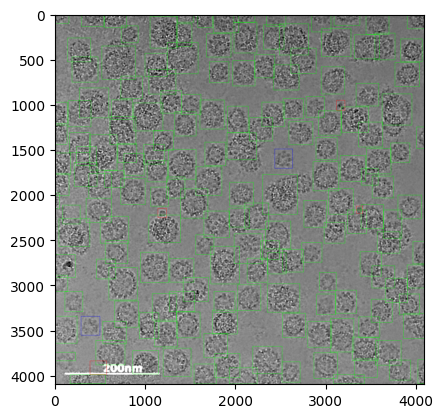

In [1]:
from utils.YoloV8infer import patch_bbox_from_picture, plot_bboxes

"""
patch_bbox_from_picture:
Patch the picture by 768*768 with sliding window 384, and then resize into 512.

input: 
    picture_path: input cryoEM picture path
    model_path: trained YoloV8 model path: 'best.pt'
    edge_criterion: how close from edge will be determined as "edge"

Output:
    results_dict{ "name", "path",
        "bbox": [
            {"class":0, # 0 for virus, 1 for ice, 2 for unsure
            "bbox":[1,2,3,4], (xywh)
            "prob":0.8,
            "edge": Bool},
            {"class":1, 
            "bbox":[11,12,13,14],
            "prob":0.8,
            "edge": Bool},    
    ]}
"""

results_dict = patch_bbox_from_picture(picture_path = '/home/xionjing/br-bards-digitalpathology/CyroEM_segmentation/Inference_pipeline/sample_pics/T39 Rd2 FAP Arm C_15-9-8-2_73000x.png',
                            model_path = "/home/xionjing/CyroEM_segment/best.pt")


"""
Take the output patch_bbox_from_picture, plot the bounding boxes prediction, save to the saving_folder.

input: 
    results_dict: from function patch_bbox_from_picture
    saving_folder: image saving folder. If not provided, it won't save the picture.

Output: Draw a picture
"""

plot_bboxes(results_dict, "/home/xionjing/cuda")



## SAM infer with bounding box

In [ ]:
from utils.SAM_infer import SAM_infer, draw_mask_annotations_512, Load_SAM

"""SAM_infer
Obtain the segmentation prediction by SAM.

input: 
    results_dict: YoloV8infer result
    sam_pred: SAM model loaded from Load_SAM
    ckpt: check point of SAM model if not loaded

Output:
    annotation{ "path", "name",
        "result": 
         {"bbox":
                {0: [],
                1: [], 
                2: []} ,
          "segment": [{
                        "mask": resized_mask,
                        "class": class_id
                    }]}
        }
"""

sam_pred = Load_SAM(ckpt = "/home/xionjing/segment-anything/model_checkpoint/sam_vit_h_4b8939.pth")
annotation = SAM_infer(results_dict = results_dict,sam_pred = sam_pred)

draw_mask_annotations_512(annotation, segment = True)

## Full function for one picture analysis

In [1]:
from utils.pipeline import analysis_one_picture

File: T39 Rd2 FAP Arm C_15-9-8-2_73000x.png
Bounding boxes:176
Inference time:12.03 seconds.
Model load time:6.45 seconds.
176
Infer Used time:59.05 seconds.
Bounding box prediction image generated: /home/xionjing/cuda/T39 Rd2 FAP Arm C_15-9-8-2_73000x.png_bbox.jpg


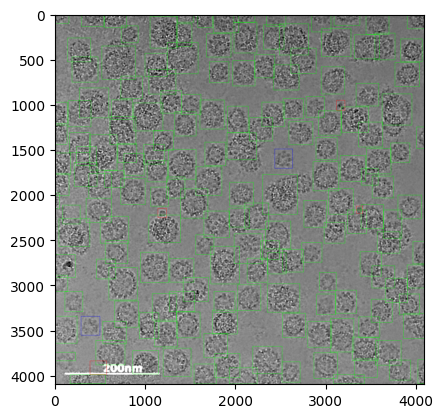

Bounding box prediction image generated: /home/xionjing/cuda/T39 Rd2 FAP Arm C_15-9-8-2_73000x.png_segment.jpg


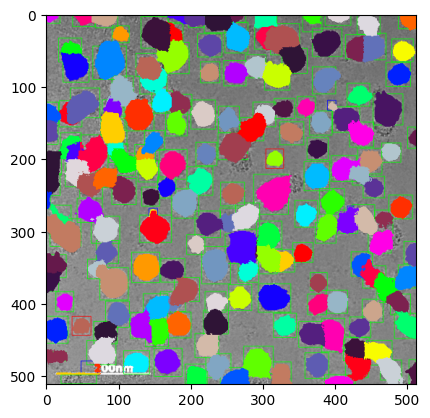

In [2]:
picture_path = '/home/xionjing/br-bards-digitalpathology/CyroEM_segmentation/Inference_pipeline/sample_pics/T39 Rd2 FAP Arm C_15-9-8-2_73000x.png'
Yolo_path = "/home/xionjing/CyroEM_segment/best.pt"
SAM_path = "/home/xionjing/segment-anything/model_checkpoint/sam_vit_h_4b8939.pth"
plot_folder = "/home/xionjing/cuda/feature_result.csv"

annotation = analysis_one_picture(picture_path, Yolo_path, SAM_path, plot_folder = plot_folder, plot_result = True)


## Function to analysis all pictures from one folder

In [1]:
from utils.pipeline import analysis_pictures_from_folder

picture_folder_path = '/home/xionjing/br-bards-digitalpathology/CyroEM_segmentation/Inference_pipeline/sample_pics'
Yolo_path = "/home/xionjing/CyroEM_segment/best.pt"
SAM_path = "/home/xionjing/segment-anything/model_checkpoint/sam_vit_h_4b8939.pth"
plot_folder = "/home/xionjing/cuda"
result_save_path = "/home/xionjing/cuda/result.pkl"
feature_table_path = "/home/xionjing/cuda/"

annotation = analysis_pictures_from_folder(picture_folder_path, Yolo_path, SAM_path,
                                           result_save_path = result_save_path, plot_folder = plot_folder,
                                           feature_table_path = feature_table_path)

SAM Model load time:8.59 seconds.
File: T35FAP~1.png
Bounding boxes:130
YoloV8 Inference time:12.75 seconds.
130
SAM Inference time:59.12 seconds.
Bounding box prediction image generated: /home/xionjing/cuda/T35FAP~1.png_bbox.jpg
Segment mask prediction image generated: /home/xionjing/cuda/T35FAP~1.png_segment.jpg
File: T35DB7~1.png
Bounding boxes:173
YoloV8 Inference time:2.98 seconds.
173
SAM Inference time:68.33 seconds.
Bounding box prediction image generated: /home/xionjing/cuda/T35DB7~1.png_bbox.jpg
Segment mask prediction image generated: /home/xionjing/cuda/T35DB7~1.png_segment.jpg
File: T39 Rd2 FAP Arm C_15-9-8-2_73000x.png
Bounding boxes:176
YoloV8 Inference time:3.2 seconds.
176
SAM Inference time:64.05 seconds.
Bounding box prediction image generated: /home/xionjing/cuda/T39 Rd2 FAP Arm C_15-9-8-2_73000x.png_bbox.jpg
Segment mask prediction image generated: /home/xionjing/cuda/T39 Rd2 FAP Arm C_15-9-8-2_73000x.png_segment.jpg
Annotation result saved at: /home/xionjing/cuda/

In [1]:
from utils.compute_features import compute_features

import pickle
with open("/home/xionjing/cuda/result.pkl", "rb") as f:
    annotation = pickle.load(f)
df = compute_features(annotation, edge_threshold=1)
print(df)

                                                  path  \
0    /home/xionjing/br-bards-digitalpathology/CyroE...   
1    /home/xionjing/br-bards-digitalpathology/CyroE...   
2    /home/xionjing/br-bards-digitalpathology/CyroE...   
3    /home/xionjing/br-bards-digitalpathology/CyroE...   
4    /home/xionjing/br-bards-digitalpathology/CyroE...   
..                                                 ...   
474  /home/xionjing/br-bards-digitalpathology/CyroE...   
475  /home/xionjing/br-bards-digitalpathology/CyroE...   
476  /home/xionjing/br-bards-digitalpathology/CyroE...   
477  /home/xionjing/br-bards-digitalpathology/CyroE...   
478  /home/xionjing/br-bards-digitalpathology/CyroE...   

                                      name  mask_total_pixels  eccentricity  \
0                             T35FAP~1.png                923      0.398884   
1                             T35FAP~1.png                126      0.843195   
2                             T35FAP~1.png                215     